In [4]:
import json 
import numpy as np 
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt 
  
# Dataset link:  
# https://github.com/PawanKrGunjan/Natural-Language-Processing/blob/main/Sarcasm%20Detection/sarcasm.json 
df=pd.read_csv('Abstract_TransData_Clean.csv')
df.fillna("", inplace = True)
df.head()
df.columns = range(df.shape[1])

df['new'] = df.apply(' '.join, axis=1)
df['new']
df = pd.DataFrame(df['new'].to_list())


,0
0,regarding impact wendler glottoplasty voice w...
1,dysphoria face significant disparities barri...
2,diagnosis osteoporosis score recommended age...
3,injectable neurotoxins fillers potential optio...
4,women affected preexposure prophylaxis prep ...
...,...
194,sexual minority stress associated negative phy...
195,recent research begun address effects family s...
196,acne common associated affirming hormone the...
197,narrative research conducted covid pandemic ...


In [11]:
df[0]

0       regarding impact wendler glottoplasty voice w...
1       dysphoria face significant  disparities barri...
2      diagnosis osteoporosis score recommended   age...
3      injectable neurotoxins fillers potential optio...
4      women  affected  preexposure prophylaxis prep ...
                             ...                        
194    sexual minority stress associated negative phy...
195    recent research begun address effects family s...
196    acne common   associated affirming hormone the...
197    narrative  research conducted  covid pandemic ...
198    emerging research demonstrated binary individu...
Name: 0, Length: 199, dtype: object

In [12]:
# Extract the sentence only 
sentence = df[0].tolist()
# create vectorizer 
vectorizer = TfidfVectorizer(stop_words='english') 
  
# vectorizer the text documents 
vectorized_documents = vectorizer.fit_transform(sentence) 
  
# reduce the dimensionality of the data using PCA 
pca = PCA(n_components=2) 
reduced_data = pca.fit_transform(vectorized_documents.toarray()) 


In [62]:
MyDTM = vectorized_documents.toarray()  # convert to a regular array

ColumnNames=vectorizer.get_feature_names_out()
MyDTM_DF=pd.DataFrame(MyDTM,columns=ColumnNames)

In [64]:
MyDTM_DF.head(20)

,access,adults,affirming,associated,barriers,based,cisgender,clinical,community,conducted,...,stress,substance,support,treatment,used,using,violence,women,young,youth
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000
1,0.0,0.000000,0.393656,0.000000,0.262324,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.33543,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
2,0.0,0.000000,0.216919,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.00000,0.000000,0.264199,0.000000,0.000000,0.0,0.000000,0.0,0.000000
3,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
4,0.0,0.000000,0.142388,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.292253,0.0,0.000000
5,0.0,0.415335,0.307181,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
6,0.0,0.000000,0.361753,0.208345,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.00000,0.469049,0.000000,0.000000,0.469049,0.0,0.000000,0.0,0.265000
7,0.0,0.000000,0.474276,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.694856
8,0.0,0.000000,0.364037,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
9,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.759837,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                                              abstract  cluster
63     conduct moderated mediation analysis underst...        4
61   hormone therapy important frequently used rega...        2
28   present  develop validate patient reported out...       27
131  intimate partner sexual violence ipsv substant...        4
75   apply  lens disparities emotional distress you...        1


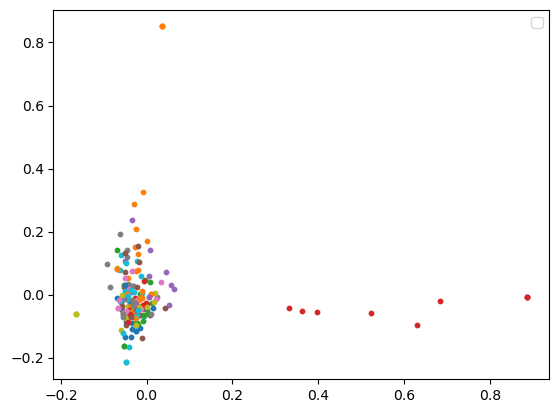

In [30]:
#cluster the documents using k-means 
num_clusters = 30
kmeans = KMeans(n_clusters=num_clusters, n_init=5, 
                max_iter=500, random_state=42) 
kmeans.fit(vectorized_documents) 
  
  
# create a dataframe to store the results 
results = pd.DataFrame() 
results['abstract'] = sentence 
results['cluster'] = kmeans.labels_ 
  
# print the results 
print(results.sample(5)) 
  
# plot the results 
#colors = ['red', 'green', 'blue', 'black', 'pink', 'purple', 'yellow'] 
#cluster = ['1','2', '3', '4','5','6','7', '8', '9','10'] 
for i in range(num_clusters): 
    plt.scatter(reduced_data[kmeans.labels_ == i, 0], 
                reduced_data[kmeans.labels_ == i, 1],  
                s=10, 
                #color=colors[i],  
                #label=f' {cluster[i]}'
               ) 
plt.legend() 
plt.show()

In [56]:
# Dataset link:  
# https://github.com/PawanKrGunjan/Natural-Language-Processing/blob/main/Sarcasm%20Detection/sarcasm.json 
df=pd.read_csv('Abstract_TransData_Clean.csv')
df.fillna("", inplace = True)
df.head()
df.columns = range(df.shape[1])

df['new'] = df.apply(' '.join, axis=1)
df['new']
df = pd.DataFrame(df['new'].to_list())

sentence = df[0].tolist()
# create vectorizer 
vectorizer = TfidfVectorizer(stop_words='english', max_features =50) 
  
# vectorizer the text documents 
vectorized_documents = vectorizer.fit_transform(sentence) 
  
# reduce the dimensionality of the data using PCA 
pca = PCA(n_components=2) 
reduced_data = pca.fit_transform(vectorized_documents.toarray()) 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                                              abstract  cluster
148  implicit biases negatively influence healthcar...        0
115  diagnostic  incongruence terms individuals sel...        0
79   argentine osteoporosis society convened renown...        1
184  lgbtqi lesbian bisexual queer intersex communi...        1
111    visiting pharmacies receive optimum  pharmac...        3


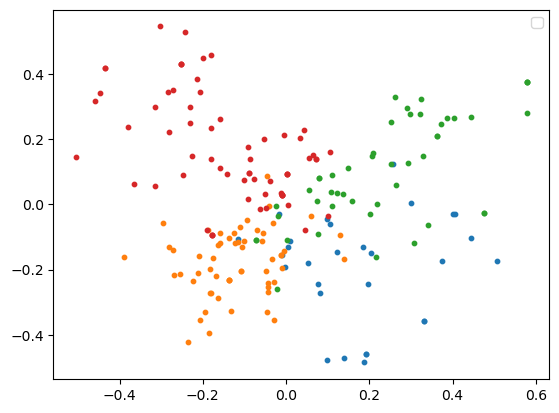

In [39]:
#cluster the documents using k-means 
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, n_init=5, 
                max_iter=500, random_state=42) 
kmeans.fit(vectorized_documents) 
  
  
# create a dataframe to store the results 
results = pd.DataFrame() 
results['abstract'] = sentence 
results['cluster'] = kmeans.labels_ 
  
# print the results 
print(results.sample(5)) 
  
# plot the results 
#colors = ['red', 'green', 'blue', 'black', 'pink', 'purple', 'yellow'] 
#cluster = ['1','2', '3', '4','5','6','7', '8', '9','10'] 
for i in range(num_clusters): 
    plt.scatter(reduced_data[kmeans.labels_ == i, 0], 
                reduced_data[kmeans.labels_ == i, 1],  
                s=10, 
                #color=colors[i],  
                #label=f' {cluster[i]}'
               ) 
plt.legend() 
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                                              abstract  cluster
167  conducted   identify emergency department rele...        4
141  individuals experience intimate partner violen...        2
1     dysphoria face significant  disparities barri...        1
198  emerging research demonstrated binary individu...        2
160  sexual minority individuals experience higher ...        0


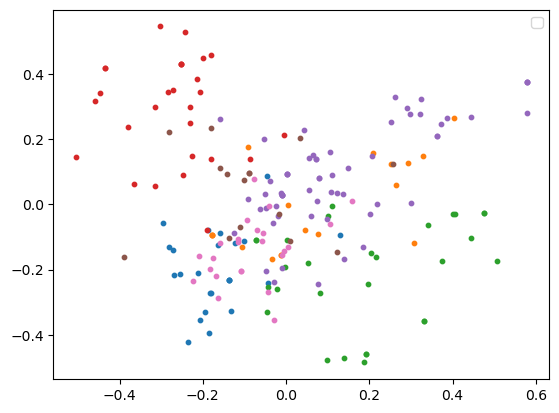

In [40]:
#cluster the documents using k-means 
num_clusters = 7
kmeans = KMeans(n_clusters=num_clusters, n_init=5, 
                max_iter=500, random_state=42) 
kmeans.fit(vectorized_documents) 
  
  
# create a dataframe to store the results 
results = pd.DataFrame() 
results['abstract'] = sentence 
results['cluster'] = kmeans.labels_ 
  
# print the results 
print(results.sample(5)) 
  
# plot the results 
#colors = ['red', 'green', 'blue', 'black', 'pink', 'purple', 'yellow'] 
#cluster = ['1','2', '3', '4','5','6','7', '8', '9','10'] 
for i in range(num_clusters): 
    plt.scatter(reduced_data[kmeans.labels_ == i, 0], 
                reduced_data[kmeans.labels_ == i, 1],  
                s=10, 
                #color=colors[i],  
                #label=f' {cluster[i]}'
               ) 
plt.legend() 
plt.show()

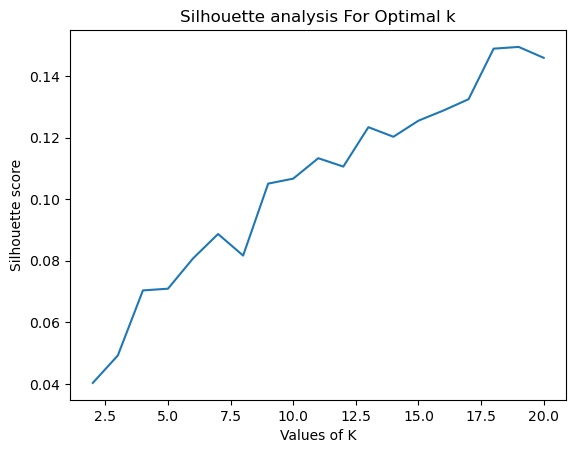

In [55]:
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10,11,12,13,14,15,16,17,18,19,20]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
#initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(vectorized_documents)
    cluster_labels = kmeans.labels_

    

    
    # silhouette score
    silhouette_avg.append(silhouette_score(vectorized_documents,cluster_labels))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


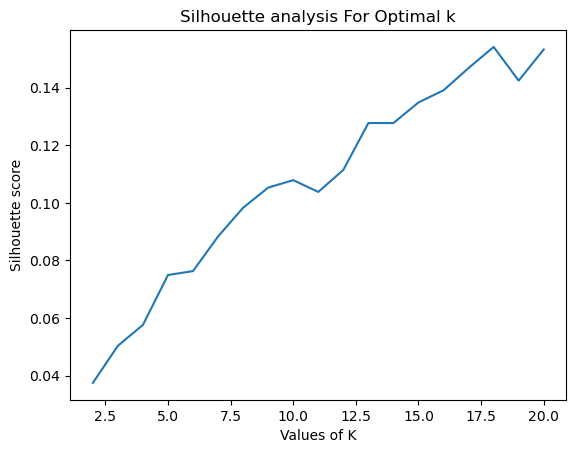

In [57]:
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10,11,12,13,14,15,16,17,18,19,20]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
#initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(vectorized_documents)
    cluster_labels = kmeans.labels_

    

    
    # silhouette score
    silhouette_avg.append(silhouette_score(vectorized_documents,cluster_labels))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()